# Summary

In this project, I worked with the Loan Approval Classification Dataset from Kaggle: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data.
This project aims to build a classification model that would predict whether or not a person should be granted a loan, given the loan's details and that person's various characteristics: loan amount, interest rates, credit score, income, etc.
To achieve that goal, I initially trained a random forest classifier. While this model achieved a high accuracy of 93% on the validation dataset, it does not perform very well on the positive instances. Therefore, I tried to improve the model twice using two different methods. However, none of these updated models significantly beated the first one in terms of accuracy, both on the whole validation dataset and on the positive instances. Therefore, I concluded by choosing the original model and use it to make predictions on the test dataset. The achieved accuracy is 92.94%.

# Importing data

In [1]:
import pandas as pd
csv_file_path = "./loan_data.csv"

df = pd.read_csv(csv_file_path)
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# Getting used to the data

## Feature description

1. person_age: Age of the person
2. person_gender: Gender of the person
3. person_education: Highest education level
4. person_income: Annual income
5. person_emp_exp: Years of employment experience
6. person_home_ownership: Home ownership status (e.g., rent, own, mortgage)
7. loan_amnt: Loan amount requested
8. loan_intent: Purpose of the loan
9. loan_int_rate: Loan interest rate
10. loan_percent_income: Loan amount as a percentage of annual income
11. cb_person_cred_hist_length: Length of credit history in years
12. credit_score: Credit score of the person
13. previous_loan_defaults_on_file: Indicator of previous loan defaults
14. loan_status (target variable): Loan approval status: 1 = approved; 0 = rejected

## Visualizing numerical data

In [2]:
# Helper function to draw a histogram and a boxplot showing the distribution of each numerical feature
# Produced and edited from chatGPT prompt: Write Python function to draw a graph summarizing the distribution
# of the columns with numerical data in the above DataFrame"
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numerical_distributions(column, num_of_bins):
    """
    Plots the distribution and summary statistics of all numerical columns in the DataFrame.
    Args:
        columns: pd.DataFrame.column, the DataFrame column containing numerical values.
    """
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(column.dropna(), bins=num_of_bins, kde=False, color='skyblue')
    plt.title(f'{column.name} Distribution')
    plt.xlabel(column.name)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(column.dropna(), color='orange')
    plt.title(f'{column.name} Boxplot')
    plt.xlabel(column.name)

    plt.tight_layout()
    plt.show()

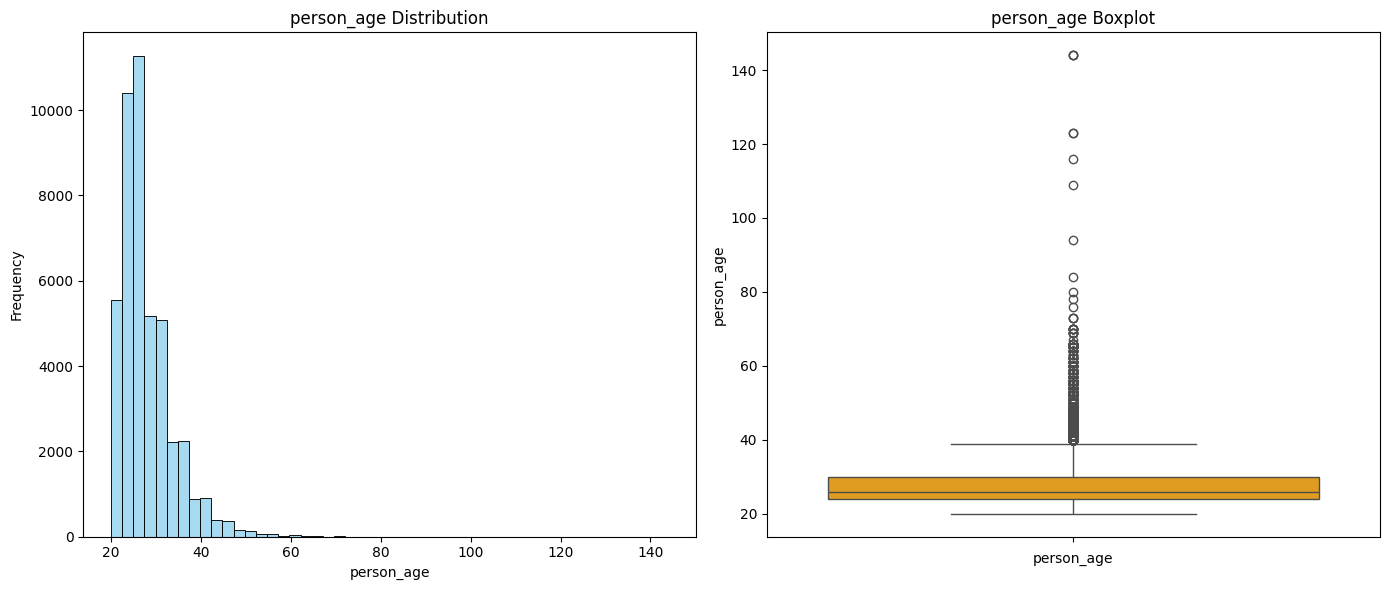

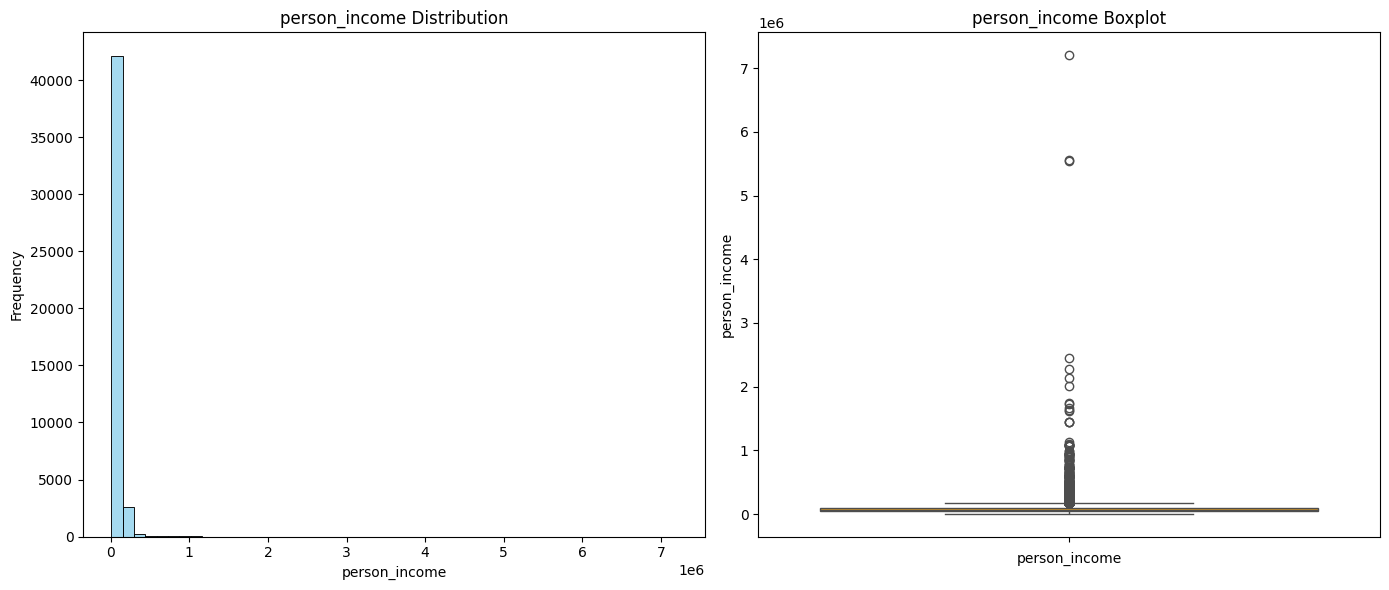

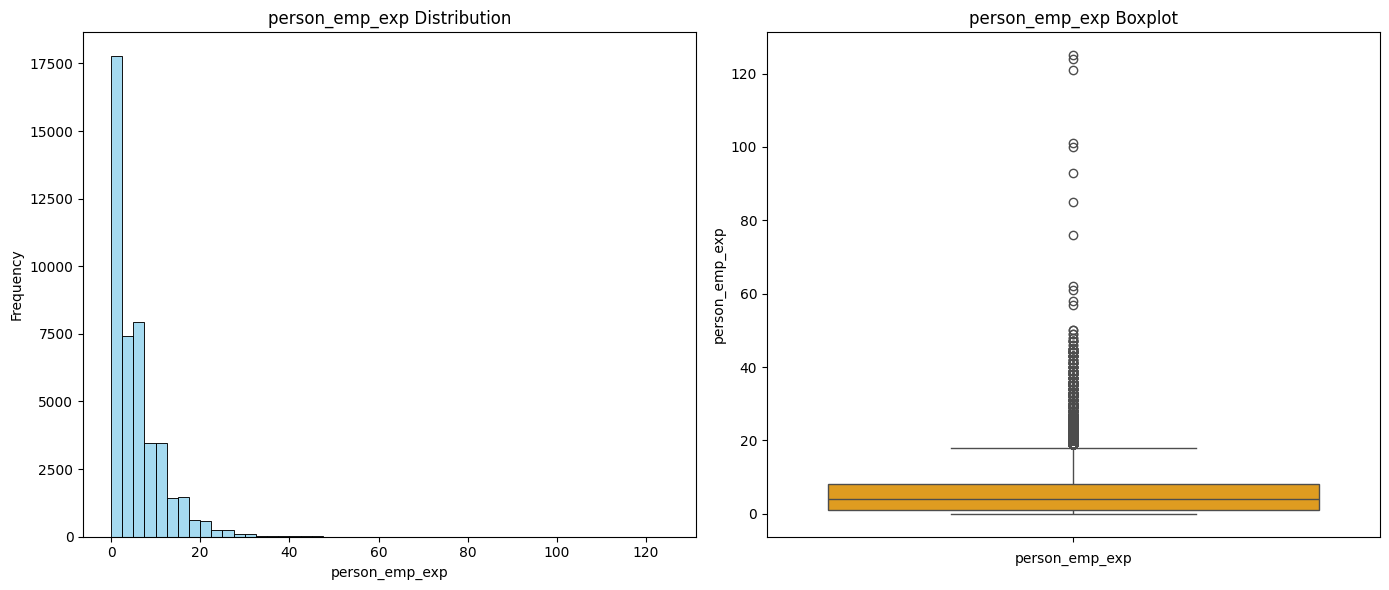

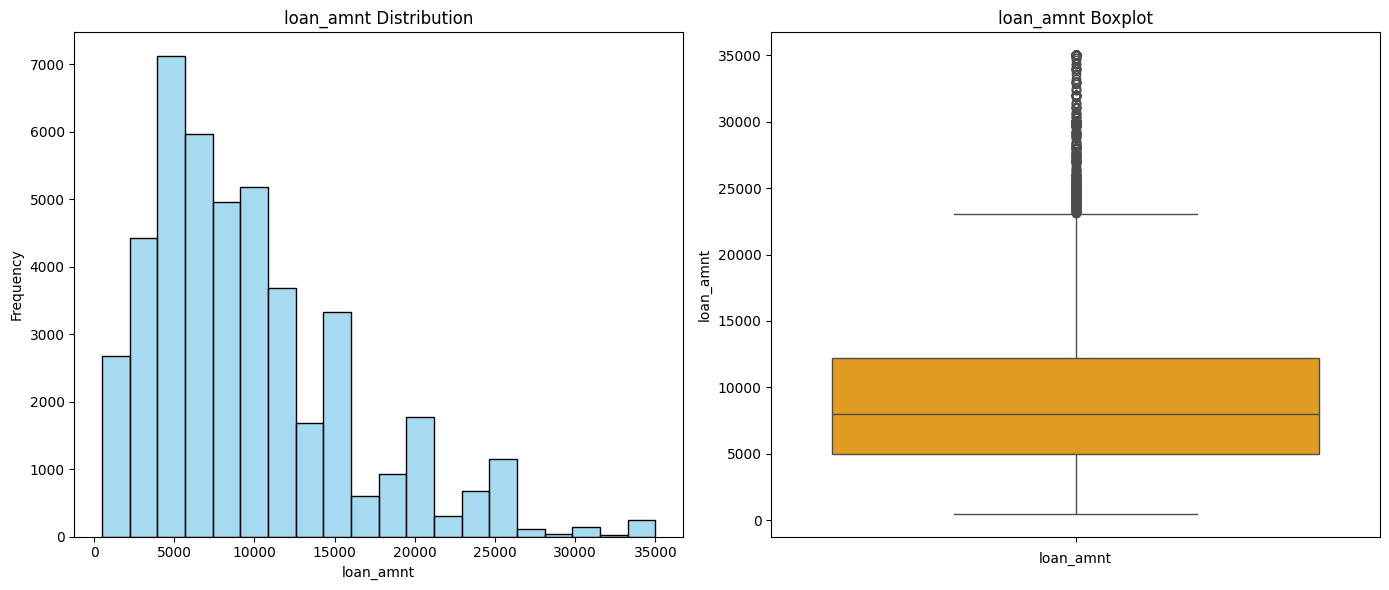

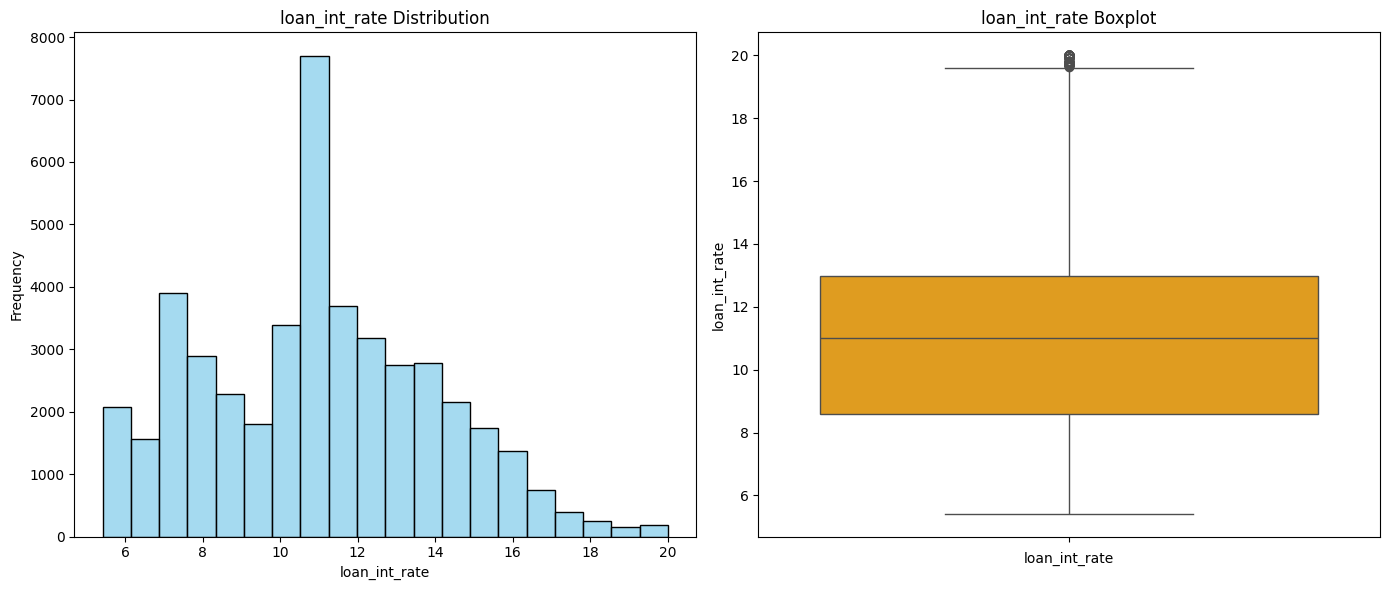

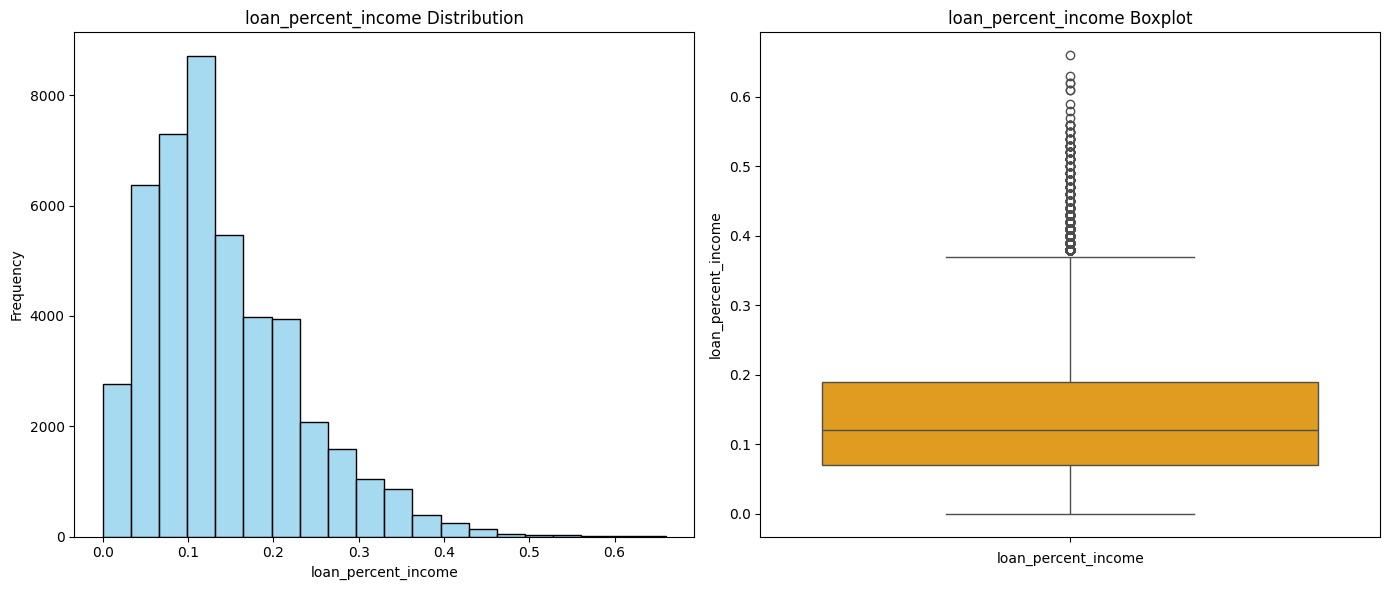

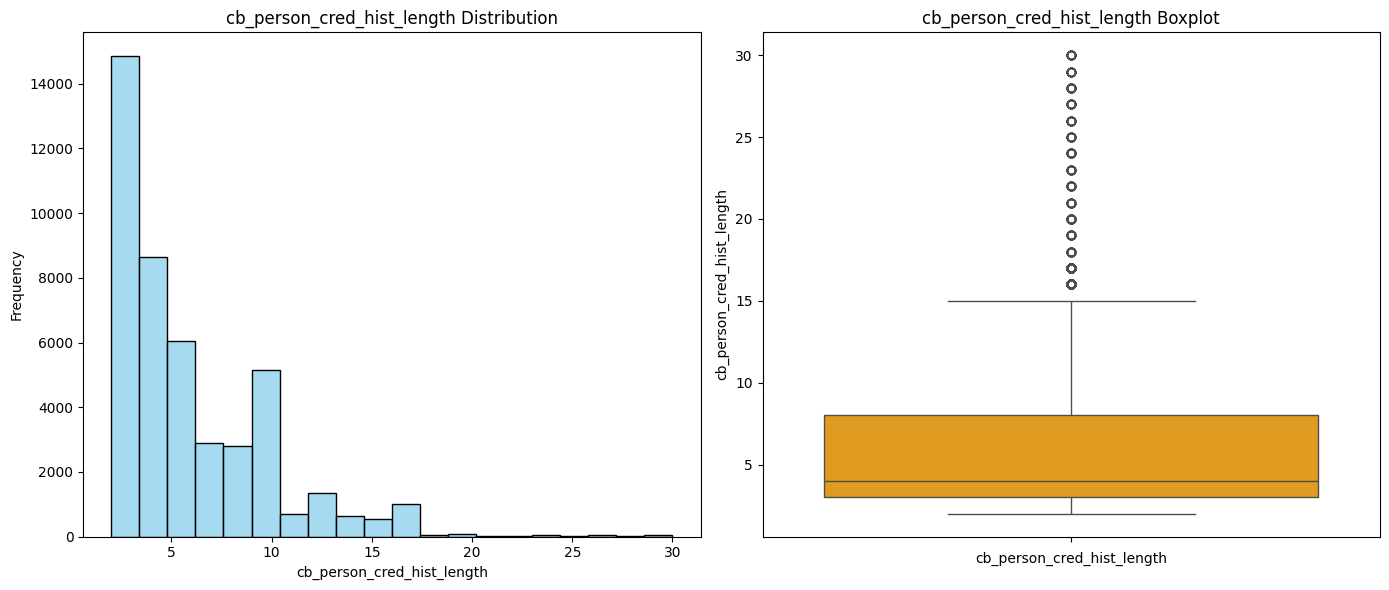

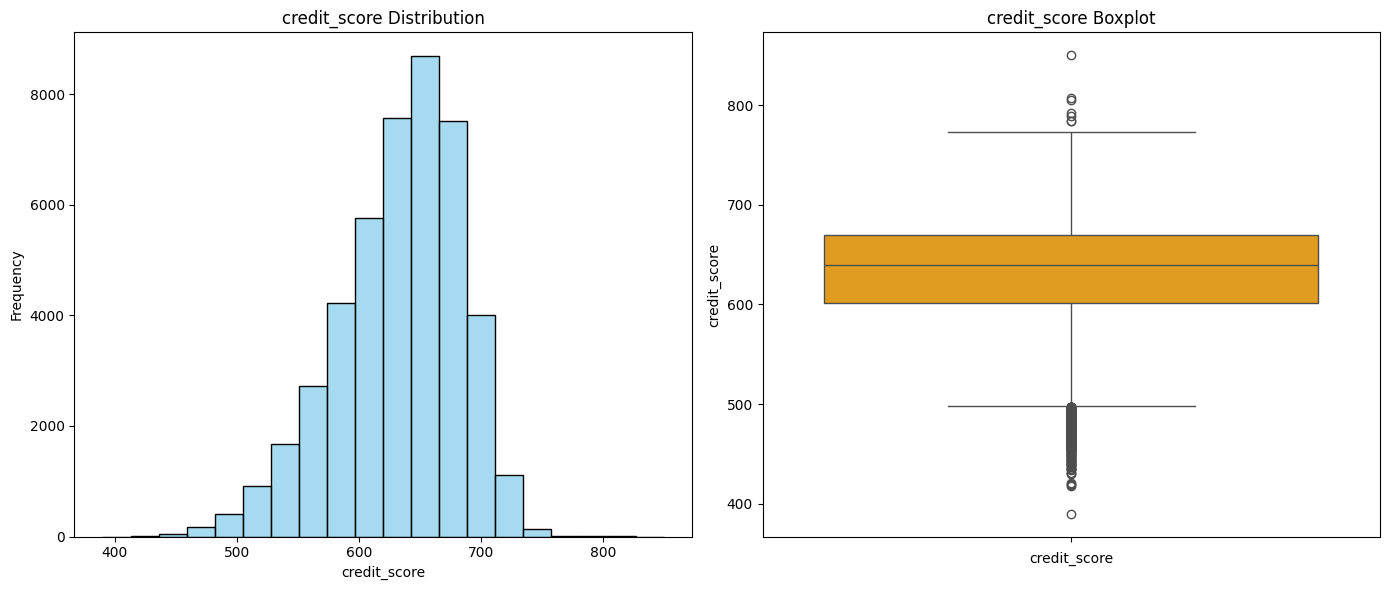

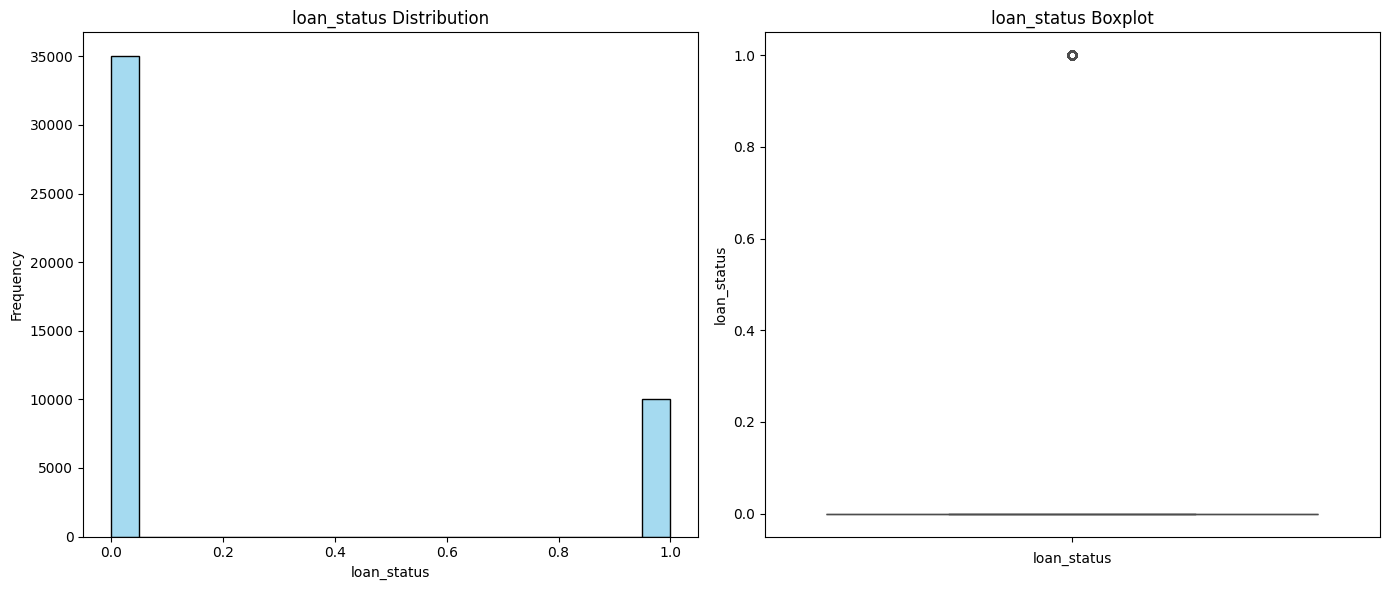

In [3]:
plot_numerical_distributions(df['person_age'], 50)
plot_numerical_distributions(df['person_income'], 50)
plot_numerical_distributions(df['person_emp_exp'], 50)
plot_numerical_distributions(df['loan_amnt'], 20)
plot_numerical_distributions(df['loan_int_rate'], 20)
plot_numerical_distributions(df['loan_percent_income'], 20)
plot_numerical_distributions(df['cb_person_cred_hist_length'], 20)
plot_numerical_distributions(df['credit_score'], 20)
plot_numerical_distributions(df['loan_status'], 20)

## Visualizing categorical data

In [4]:
# Helper function to draw a bar chart showing the distribution of each categorical feature
# Produced and edited from chatGPT prompt: Write Python function to draw a graph summarizing
# a column with categorical data in a DataFrame"
import seaborn as sns

def plot_categorical_column(df, column_name):
    """
    Plots a bar chart summarizing the distribution of a categorical column in the DataFrame.

    Args:
        df: pd.DataFrame, the DataFrame containing the column.
        column_name: str, the name of the categorical column to be summarized.

    Returns:
        None
    """
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    # Ensure the column is treated as categorical
    if not pd.api.types.is_categorical_dtype(df[column_name]):
        df[column_name] = df[column_name].astype('category')

    # Count the occurrences of each category
    category_counts = df[column_name].value_counts()

    # Plot the distribution
    plt.figure(figsize=(10, 4))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis", hue=category_counts, legend=False)
    plt.title(f"Distribution of '{column_name}'")
    plt.xlabel("Categories")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

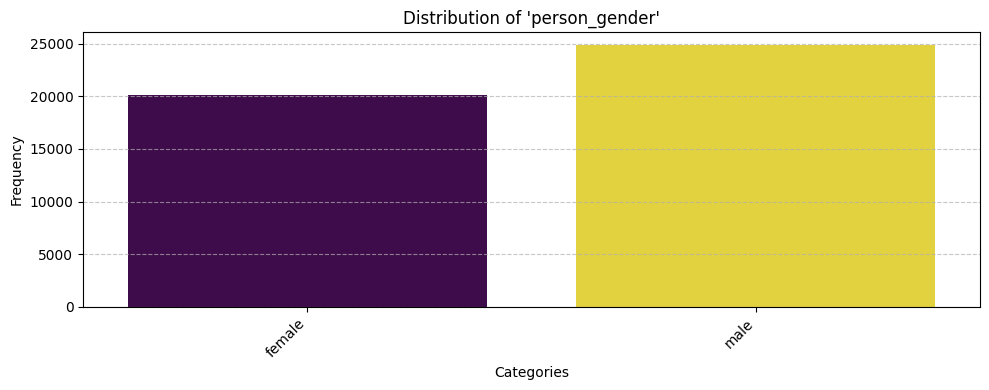

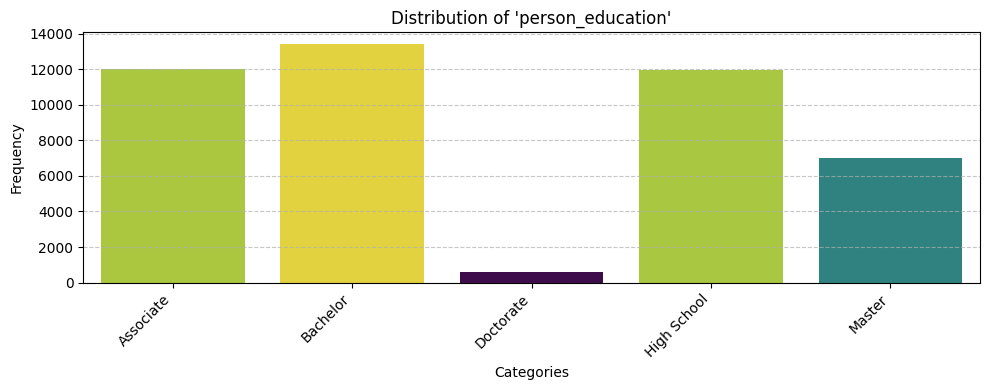

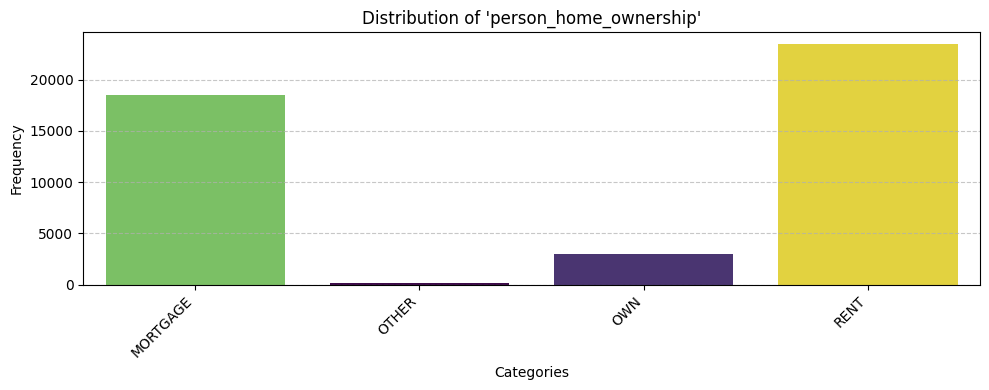

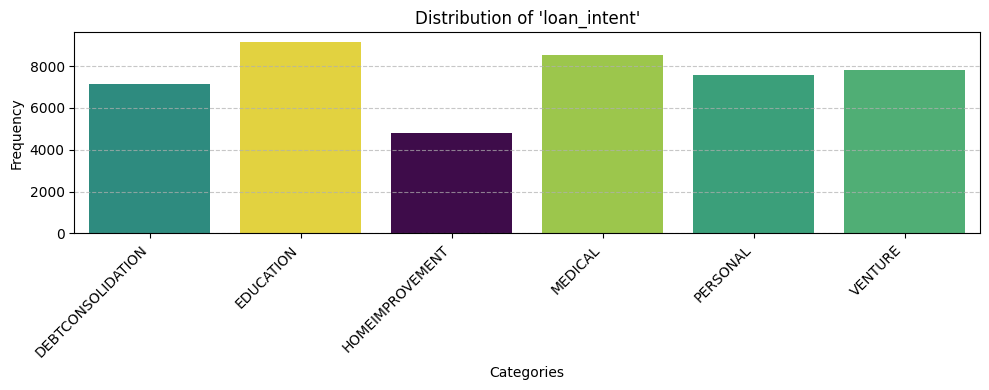

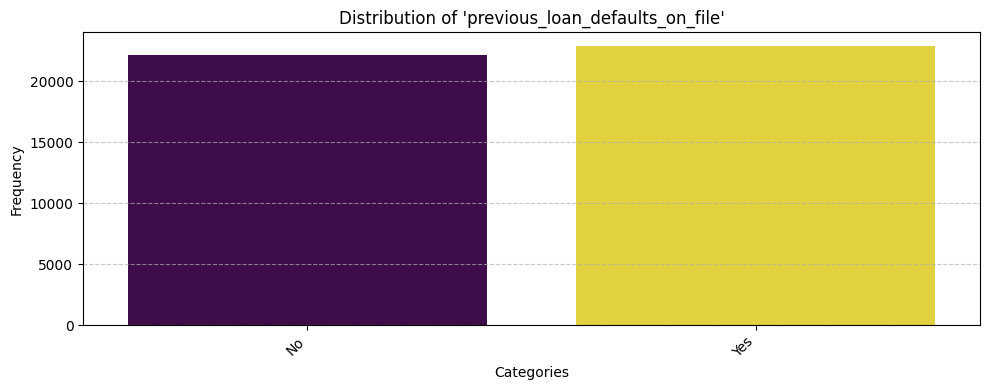

In [5]:
plot_categorical_column(df, 'person_gender')
plot_categorical_column(df, 'person_education')
plot_categorical_column(df, 'person_home_ownership')
plot_categorical_column(df, 'loan_intent')
plot_categorical_column(df, 'previous_loan_defaults_on_file')

# Cleaning data

## Removing obvious data outliers

### Removing those with age >= 100

In [6]:
drop_index = df[df['person_age'] >= 100].index
df.drop(drop_index , inplace=True)

### Removing those with employment experience >= 70

In [7]:
drop_index = df[df['person_emp_exp'] >= 70].index
df.drop(drop_index , inplace=True)

### Viewing the changed distributions after cleaning the data

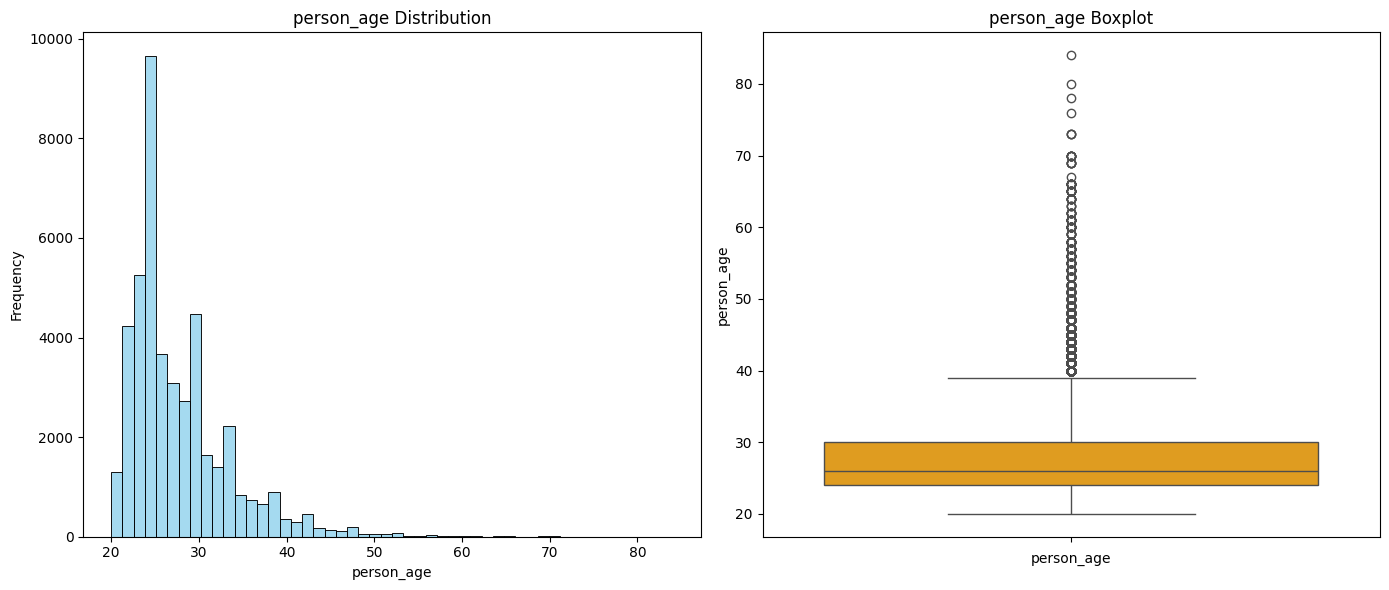

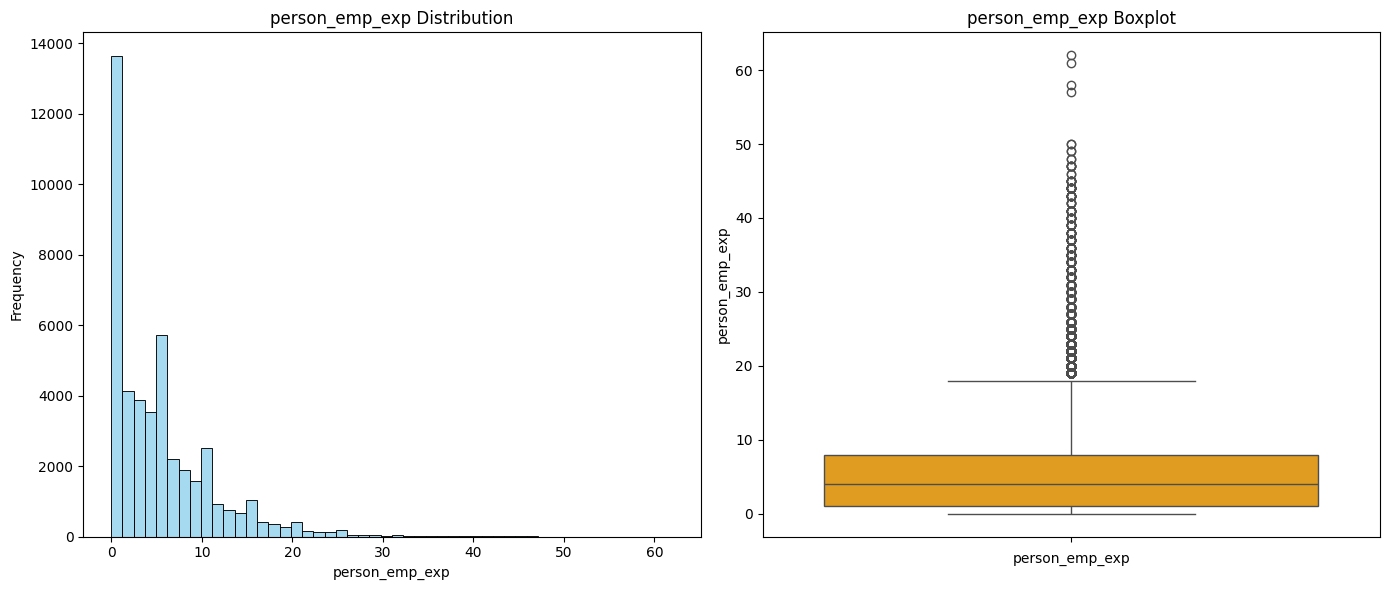

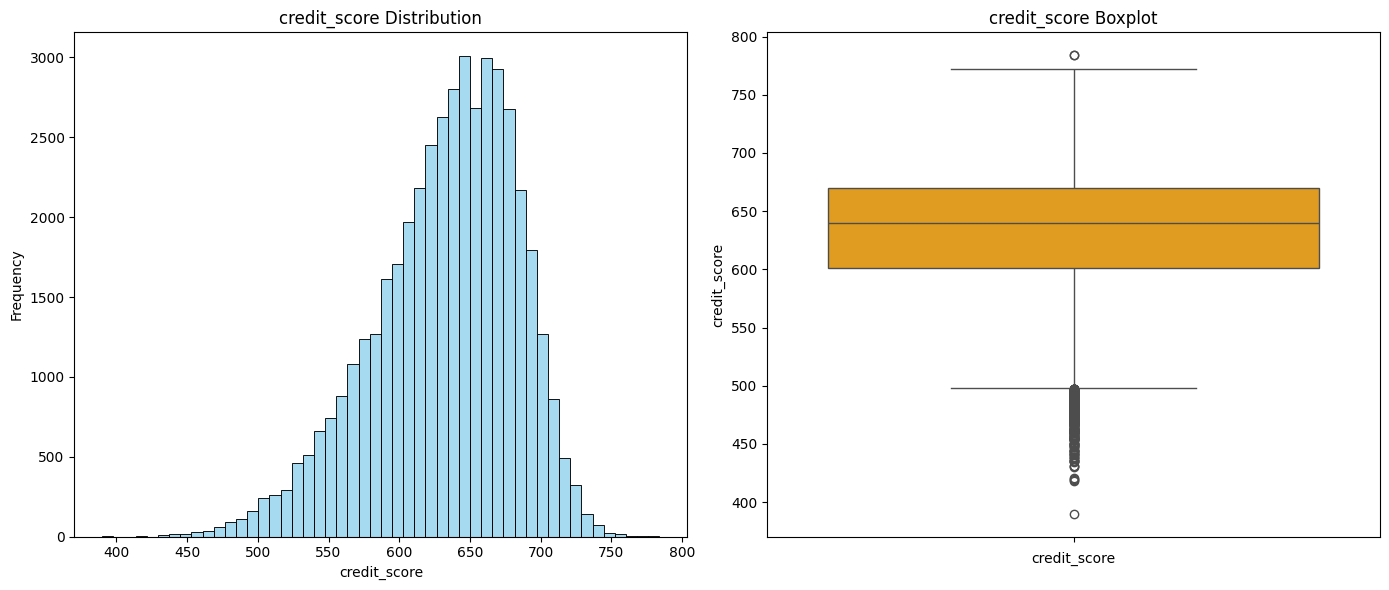

In [8]:
plot_numerical_distributions(df['person_age'], 50)
plot_numerical_distributions(df['person_emp_exp'], 50)
plot_numerical_distributions(df['credit_score'], 50)

## Converting categorical data into dummies

In [9]:
df = pd.get_dummies(df, columns=None, drop_first=True)
df

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,0,...,1,0,0,1,0,0,0,1,0,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,0,...,0,0,1,0,1,0,0,0,0,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,0,...,0,0,0,0,0,0,1,0,0,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,0,...,0,0,0,1,0,0,1,0,0,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,1,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1,1,...,0,0,0,1,0,0,1,0,0,0
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1,0,...,0,0,0,1,0,1,0,0,0,0
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1,1,...,0,0,0,1,0,0,0,0,0,0
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1,1,...,0,0,0,1,1,0,0,0,0,0


Out of k categorical levels in each category, we get an extra k-1 columns. For example, the "person_home_ownership" variable has 4 categories: "MORTGAGE, OTHER, OWN, RENT". 3 extra variables are created: "person_home_ownership_OTHER", "person_home_ownership_OWN", "person_home_ownership_RENT".

# Creating datasets

## Splitting features and labels

In [10]:
y = df['loan_status']
X = df[df.columns.drop('loan_status')]

## Splitting the dataset into training, testing, and validating datasets

In [11]:
from sklearn.model_selection import train_test_split

train_test_X, validate_X, train_test_y, validate_y = train_test_split(X, y, test_size=9000, random_state=10)
train_X, test_X, train_y, test_y = train_test_split(train_test_X, train_test_y, test_size=9000, random_state=10)

The datasets' shape after splitting:

In [12]:
print(f"train_X: {train_X.shape}")
print(f"validate_X: {validate_X.shape}")
print(f"test_X: {test_X.shape}")
print(f"train_y: {train_y.shape}")
print(f"validate_y: {validate_y.shape}")
print(f"test_y: {test_y.shape}")

train_X: (26992, 22)
validate_X: (9000, 22)
test_X: (9000, 22)
train_y: (26992,)
validate_y: (9000,)
test_y: (9000,)


# Training

## Random Forest Classifier

### Fitting

In [13]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators=500,
                                                  criterion='entropy', 
                                                  n_jobs=-1,
                                                  random_state=40)
random_forest_classifier.fit(train_X, train_y)

RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=-1,
                       random_state=40)

In [14]:
# Saving the model
import joblib
joblib.dump(random_forest_classifier, "random_forest_classifier_v1.pkl")

['random_forest_classifier_v1.pkl']

### Evaluating

The model's accuracy on the validation dataset is: 0.9303


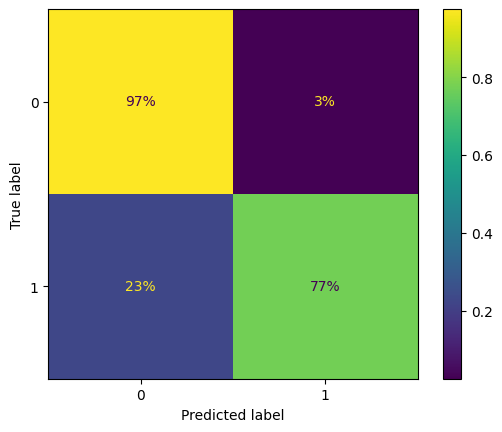

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
print(f"The model's accuracy on the validation dataset is: {round(random_forest_classifier.score(validate_X, validate_y), 4)}")
predicted_y = random_forest_classifier.predict(validate_X)
ConfusionMatrixDisplay.from_predictions(validate_y, predicted_y, normalize="true", values_format=".0%")
plt.show()

We see that almost 1 in 4 positive instances is predicted as a negative one. We proceed to investigate the reason behind this issue.

### View feature importances

In [16]:
rfc_features_importances = pd.DataFrame({'Feature' : random_forest_classifier.feature_names_in_,
                                         'Feature importance' : random_forest_classifier.feature_importances_})

rfc_features_importances = rfc_features_importances.sort_values(by=['Feature importance'], ascending=False).head(10)
rfc_features_importances

,Feature,Feature importance
21,previous_loan_defaults_on_file_Yes,0.276974
5,loan_percent_income,0.140489
4,loan_int_rate,0.138041
1,person_income,0.112844
3,loan_amnt,0.059095
7,credit_score,0.053702
15,person_home_ownership_RENT,0.052389
0,person_age,0.032056
2,person_emp_exp,0.029754
6,cb_person_cred_hist_length,0.027219


The most important features are:
1. previous_loan_defaults_on_file: Indicator of previous loan defaults
2. loan_int_rate: Loan interest rate
3. loan_percent_income: Loan amount as a percentage of annual income
4. person_income: Annual income
5. loan_amnt: Loan amount requested
6. credit_score: Credit score of the person

### Summary of false negatives

Collecting the TN, FP, FN, TP instances

In [17]:
# True negative
X_00 = validate_X[(validate_y == 0) & (predicted_y == 0)]

# False positive
X_01 = validate_X[(validate_y == 0) & (predicted_y == 1)]

# False negative
X_10 = validate_X[(validate_y == 1) & (predicted_y == 0)]

# True positive
X_11 = validate_X[(validate_y == 1) & (predicted_y == 1)]

# Viewing the false negative's dataframe
X_10

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Bachelor,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
2584,25.0,35864.0,1,3000.0,6.62,0.08,2.0,600,0,0,...,0,0,0,1,0,0,1,0,0,0
42638,23.0,39487.0,0,4882.0,14.25,0.12,3.0,664,1,0,...,0,0,0,1,0,0,0,0,1,0
44446,33.0,58656.0,14,6990.0,12.10,0.12,5.0,654,1,1,...,0,0,0,0,0,0,1,0,0,0
13613,23.0,85433.0,0,15000.0,8.90,0.18,4.0,678,0,0,...,0,0,0,0,0,0,1,0,0,0
27622,35.0,168855.0,11,8400.0,12.98,0.05,9.0,657,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32274,38.0,36945.0,17,3000.0,13.85,0.08,14.0,695,1,0,...,0,0,0,1,0,0,1,0,0,0
42518,28.0,58368.0,3,8000.0,11.22,0.14,6.0,647,0,1,...,0,0,0,1,1,0,0,0,0,0
31018,46.0,65814.0,24,10000.0,11.71,0.15,15.0,698,0,1,...,0,0,0,1,0,0,0,1,0,0
43167,23.0,107265.0,0,8038.0,14.08,0.07,4.0,619,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Helper function to plot 2 histograms side-by-side
def plot_side_by_side_distributions(column1, column2):
    """
    Plots the distribution and summary statistics 2 DataFrame columns of numerical data.
    Args:
        column1, column2: pd.DataFrame.columns, the DataFrame column containing numerical values.
    """
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(column1.dropna(), bins=50, kde=False, color='skyblue')
    plt.title("False positive in validation dataset distribution")
    plt.xlabel(column1.name)
    plt.ylabel('Frequency')

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(column2.dropna(), bins=50, kde=False, color='skyblue')
    plt.title("Validation dataset distribution")
    plt.xlabel(column1.name)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

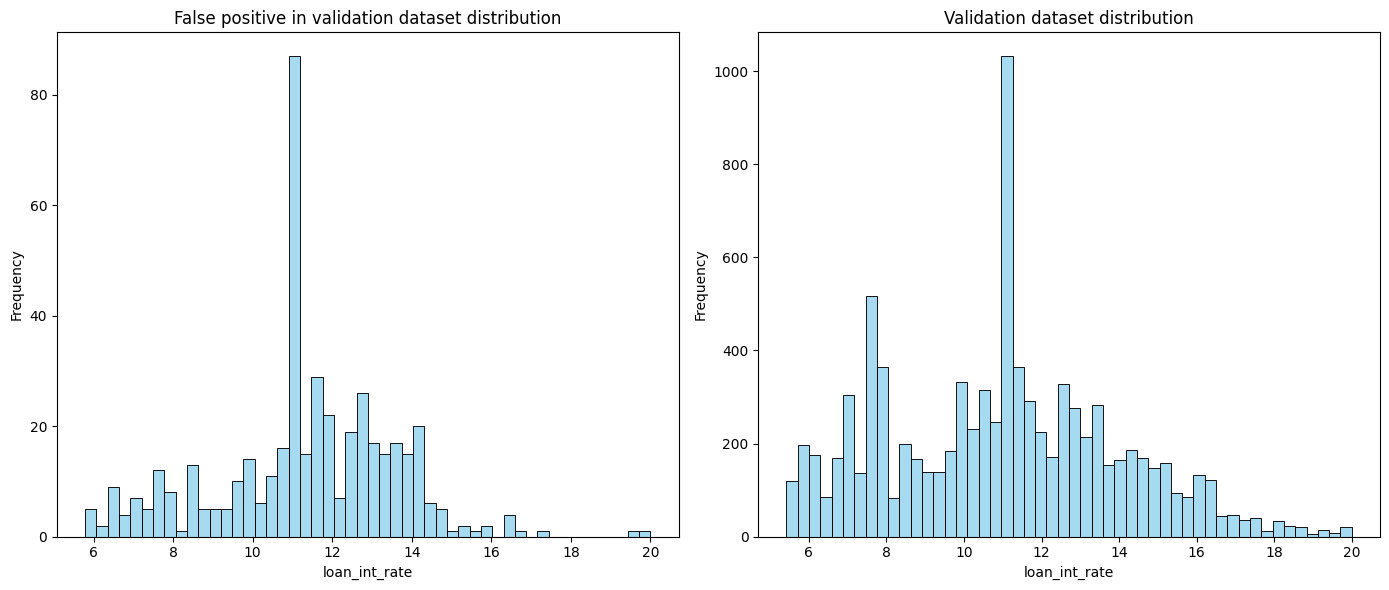

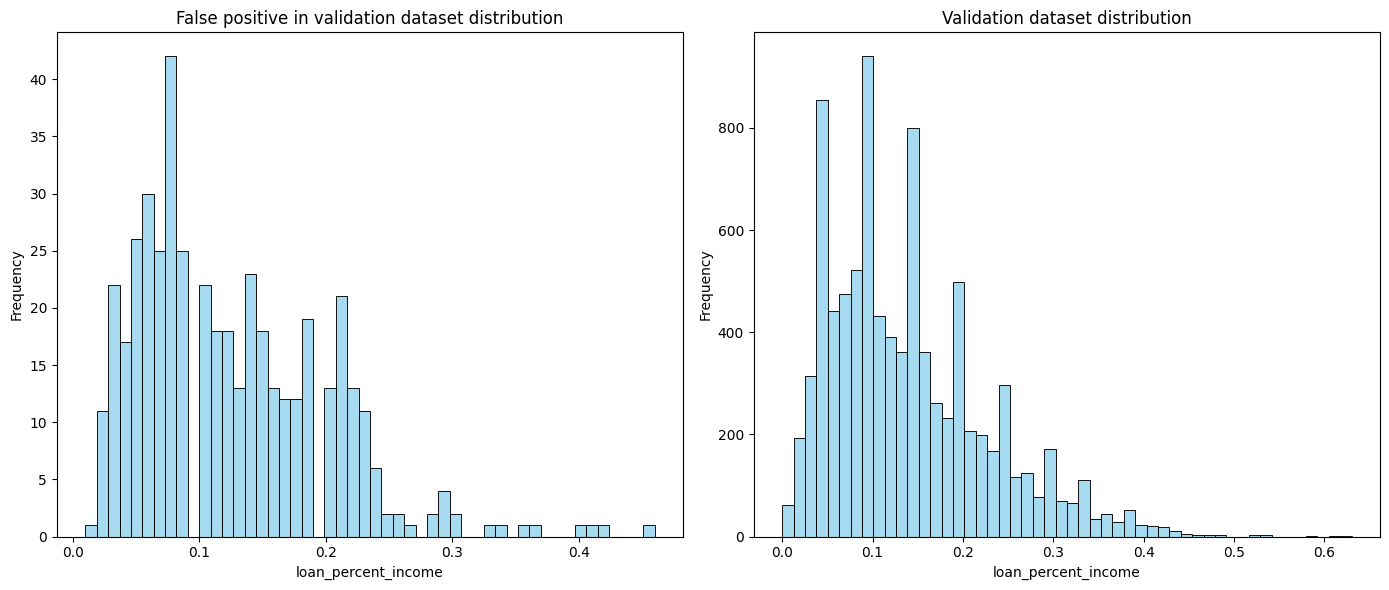

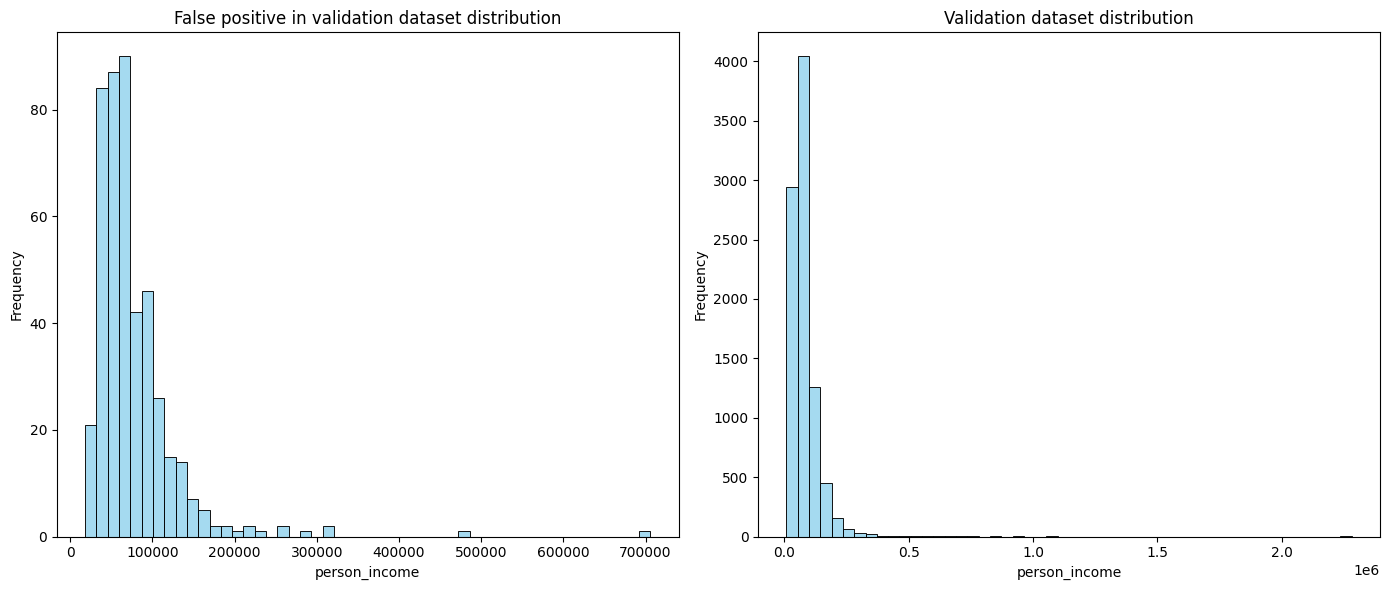

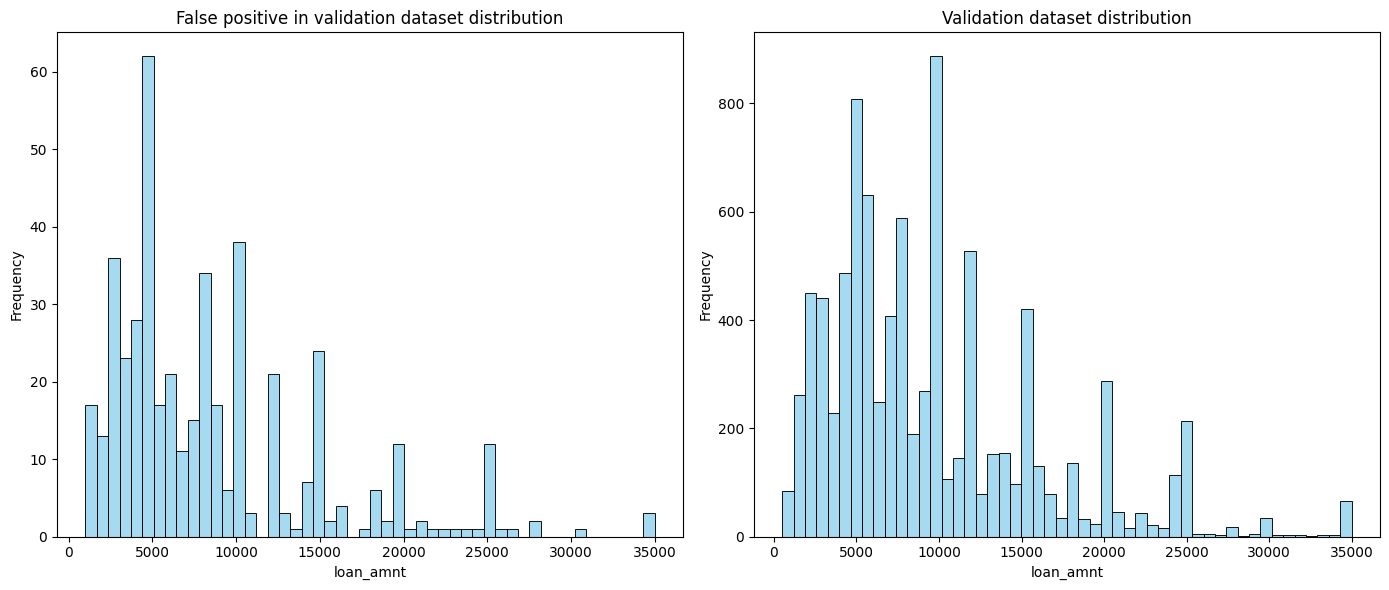

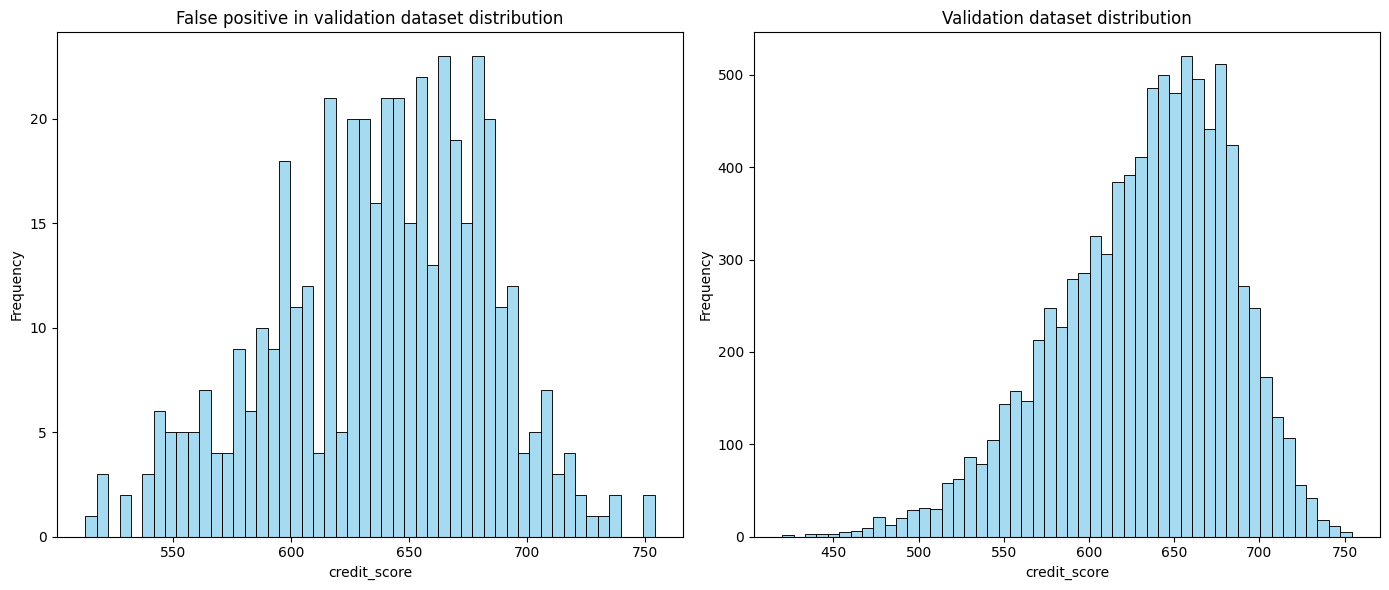

In [19]:
# Plotting 2 side-by-side historgrams, the left one shows the distribution of the false negatives,
# while the right one shows the distribution of the validation dataset
plot_side_by_side_distributions(X_10['loan_int_rate'], validate_X['loan_int_rate'])
plot_side_by_side_distributions(X_10['loan_percent_income'], validate_X['loan_percent_income'])
plot_side_by_side_distributions(X_10['person_income'], validate_X['person_income'])
plot_side_by_side_distributions(X_10['loan_amnt'], validate_X['loan_amnt'])
plot_side_by_side_distributions(X_10['credit_score'], validate_X['credit_score'])

In [20]:
# Helper function to draw a bar chart showing the distribution of each categorical feature
# Produced and edited from chatGPT prompt: Write Python function to draw a graph summarizing a column with categorical data in a DataFrame"
import seaborn as sns

def plot_categorical_column_with_title_addition(df, column_name, title_addition):
    """
    Plots a bar chart summarizing the distribution of a categorical column in the DataFrame.

    Args:
        df: pd.DataFrame, the DataFrame containing the column.
        column_name: str, the name of the categorical column to be summarized.

    Returns:
        None
    """
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    # Ensure the column is treated as categorical
    if not pd.api.types.is_categorical_dtype(df[column_name]):
        df[column_name] = df[column_name].astype('category')

    # Count the occurrences of each category
    category_counts = df[column_name].value_counts()

    # Plot the distribution
    plt.figure(figsize=(10, 4))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis", hue=category_counts, legend=False)
    plt.title(f"Distribution of '{column_name}' in the {title_addition}")
    plt.xlabel("Categories")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

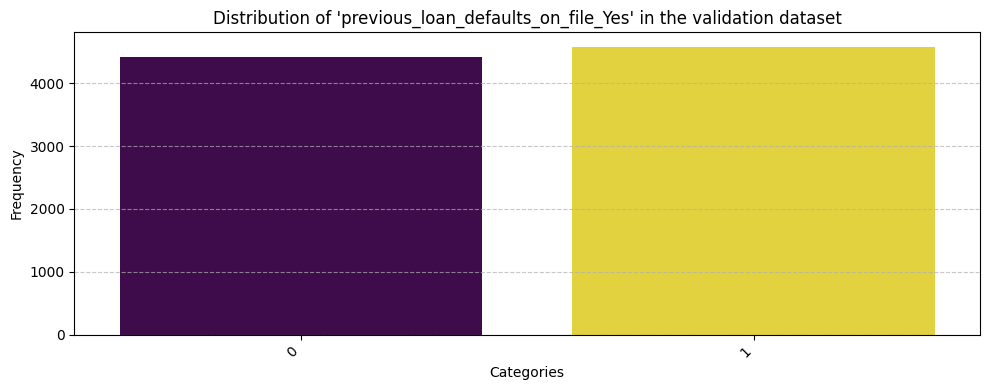

/var/folders/kh/5ycz460j13q1bq3hw3ytwplw0000gn/T/ipykernel_35804/1570375067.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].astype('category')


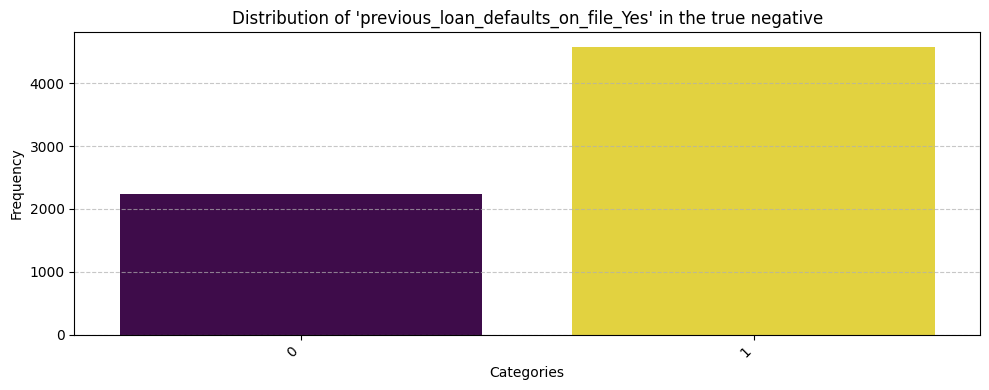

/var/folders/kh/5ycz460j13q1bq3hw3ytwplw0000gn/T/ipykernel_35804/1570375067.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].astype('category')


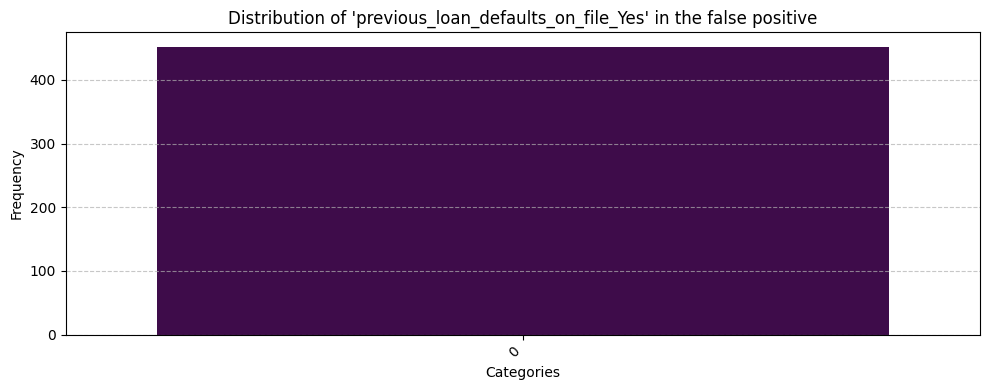

/var/folders/kh/5ycz460j13q1bq3hw3ytwplw0000gn/T/ipykernel_35804/1570375067.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].astype('category')


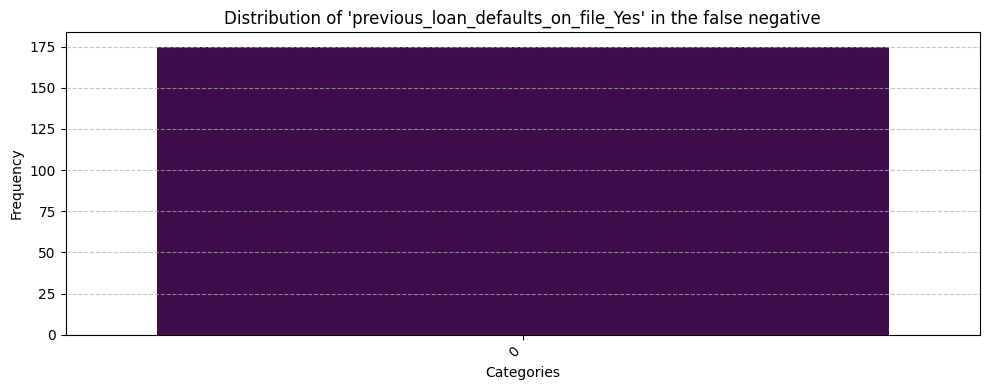

/var/folders/kh/5ycz460j13q1bq3hw3ytwplw0000gn/T/ipykernel_35804/1570375067.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].astype('category')


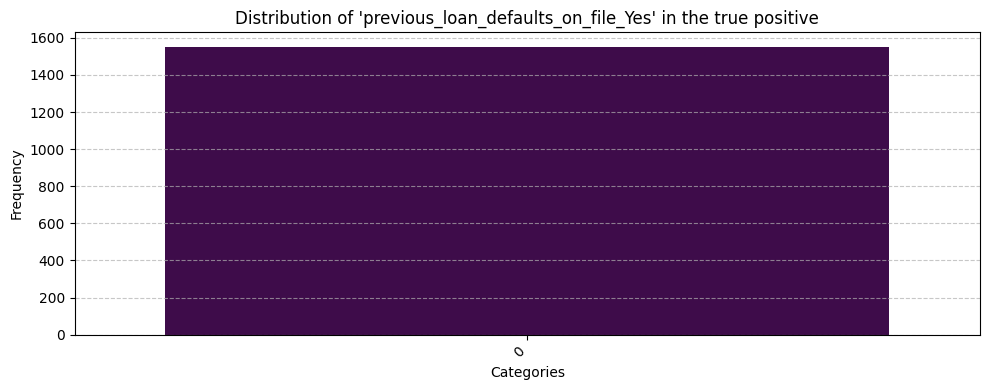

In [21]:
plot_categorical_column_with_title_addition(validate_X, 'previous_loan_defaults_on_file_Yes', "validation dataset")
plot_categorical_column_with_title_addition(X_00, 'previous_loan_defaults_on_file_Yes', "true negative")
plot_categorical_column_with_title_addition(X_10, 'previous_loan_defaults_on_file_Yes', "false positive")
plot_categorical_column_with_title_addition(X_01, 'previous_loan_defaults_on_file_Yes', "false negative")
plot_categorical_column_with_title_addition(X_11, 'previous_loan_defaults_on_file_Yes', "true positive")

All of the false positives have previous_loan_defaults_on_file_Yes = 0 i.e., previous_loan_defaults_on_file = "No" (the same happens for all of the True Positives and False Positives).
Maybe the importance of previous_loan_defaults_on_file should be higher. We will examine that in section 6.3

## Random Forest Classifier, Hyperparameter tuning version

### Tuning the model

In the section below, I tried to search for the optimal combination of the number of estimators, the max depth, and the criterion function of the Random forest classifier

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=40)

param_distributions = dict(n_estimators=[100, 200, 300, 400, 500],
                           max_depth=[i for i in range(1, 100)],
                           criterion=['gini', 'entropy'])

rfc_searched = RandomizedSearchCV(
    rfc,
    param_distributions=param_distributions,
    n_iter=50,
    cv=3,
    verbose=2.5,
    scoring='accuracy', random_state=42)

rfc_searched.fit(train_X, train_y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END criterion=gini, max_depth=43, n_estimators=400;, score=0.922 total time=   7.2s
[CV 2/3] END criterion=gini, max_depth=43, n_estimators=400;, score=0.924 total time=   6.9s
[CV 3/3] END criterion=gini, max_depth=43, n_estimators=400;, score=0.922 total time=   6.8s
[CV 1/3] END criterion=gini, max_depth=67, n_estimators=200;, score=0.922 total time=   3.5s
[CV 2/3] END criterion=gini, max_depth=67, n_estimators=200;, score=0.924 total time=   3.6s
[CV 3/3] END criterion=gini, max_depth=67, n_estimators=200;, score=0.923 total time=   3.5s
[CV 1/3] END criterion=entropy, max_depth=2, n_estimators=200;, score=0.804 total time=   1.4s
[CV 2/3] END criterion=entropy, max_depth=2, n_estimators=200;, score=0.810 total time=   1.1s
[CV 3/3] END criterion=entropy, max_depth=2, n_estimators=200;, score=0.806 total time=   1.1s
[CV 1/3] END criterion=gini, max_depth=62, n_estimators=500;, score=0.922 total time=  11.3s
[C

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=40),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='accuracy', verbose=2.5)

In [23]:
joblib.dump(rfc_searched, "random_forest_classifier_tuned.pkl")

['random_forest_classifier_tuned.pkl']

### Evaluating the tuned Random Forest Classifier

The model's accuracy on the validation dataset is: 0.9301


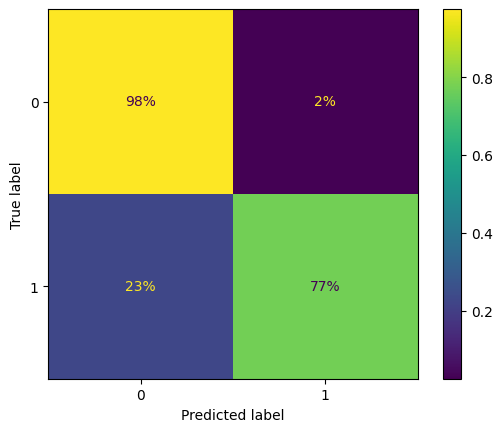

In [24]:
print(f"The model's accuracy on the validation dataset is: {round(rfc_searched.score(validate_X, validate_y), 4)}")
predicted_y = rfc_searched.predict(validate_X)
ConfusionMatrixDisplay.from_predictions(validate_y, predicted_y, normalize="true", values_format=".0%")
plt.show()

After doing random hyperparameter search, we arrive at a model whose's accuracy on the validation set does not differ much from that of the original model (0.9301 compared to 0.9303)

## Random Forest Classifier, but with only 6 important parameters involved

The model's accuracy on the validation dataset is: 0.9139


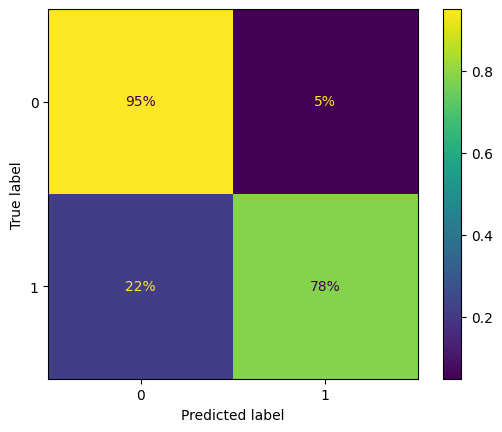

,feature,Feature Importances
0,previous_loan_defaults_on_file_Yes,0.314016
1,loan_int_rate,0.183111
3,person_income,0.168589
2,loan_percent_income,0.154359
5,credit_score,0.099608
4,loan_amnt,0.080317


In [27]:
new_y = df['loan_status']
new_X = df[["previous_loan_defaults_on_file_Yes", "loan_int_rate", "loan_percent_income", "person_income", "loan_amnt", "credit_score"]]

new_train_test_X, new_validate_X, new_train_test_y, new_validate_y = train_test_split(new_X, new_y, test_size=9000, random_state=10)
new_train_X, new_test_X, new_train_y, new_test_y = train_test_split(new_train_test_X, new_train_test_y, test_size=9000, random_state=10)

random_forest_classifier_v3 = RandomForestClassifier(n_estimators=500,
                                                  criterion='entropy', 
                                                  n_jobs=-1,
                                                  random_state=40)
random_forest_classifier_v3.fit(new_train_X, new_train_y)

joblib.dump(random_forest_classifier_v3, "random_forest_classifier_v3.pkl")

print(f"The model's accuracy on the validation dataset is: {round(random_forest_classifier_v3.score(new_validate_X, new_validate_y), 4)}")
new_predicted_y = random_forest_classifier_v3.predict(new_validate_X)
ConfusionMatrixDisplay.from_predictions(new_validate_y, new_predicted_y, normalize="true", values_format=".0%")
plt.show()

rfc_v3_features_importances = pd.DataFrame({'feature' : random_forest_classifier_v3.feature_names_in_,
                                         'Feature Importances' : random_forest_classifier_v3.feature_importances_})
rfc_v3_features_importances = rfc_v3_features_importances.sort_values(by=['Feature Importances'], ascending=False).head(10)
rfc_v3_features_importances

Unfortunately, limiting the model to only 6 most important features does not solve the problem that many positive instances are incorrectly predicted.

# Testing the model on the test set

We choose the model with the best performance i.e. the initial random_forest_classifier

The model's accuracy on the test dataset is: 0.9294


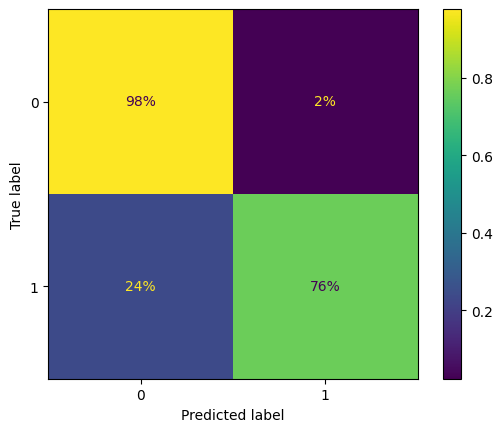

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
print(f"The model's accuracy on the test dataset is: {round(random_forest_classifier.score(test_X, test_y), 4)}")
random_forest_classifier_prediction = random_forest_classifier.predict(test_X)
ConfusionMatrixDisplay.from_predictions(test_y, random_forest_classifier_prediction, normalize="true", values_format=".0%")
plt.show()